In [26]:
import pandas as pd
import numpy as np
from scipy.stats import pointbiserialr
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

In [27]:
df = pd.read_excel("Datasets/dataset.xlsx", index_col=0)
correlations = pd.DataFrame(columns=["point biserial correlation","p-value", "mutual info"])
df.columns

Index(['text', 'label', '.', ',', ':', ';', '(', ')', '¿', '?', '¡', '!', '-',
       '"', '\', '@', '#', '$', '€', '*', '+', 'sentences', 'words', 'TTR',
       'avgWordsPerSent', 'wordCharCount', 'avgWordDensity', 'nSentsle11Words',
       'nSentsge34Words', 'caps', 'Lexical density', 'countNOUN', 'countVERB',
       'countAUX', 'countADJ', 'countPRON', 'countADV', 'countCCONJ',
       'countSCONJ', 'countADP', 'countPROPN', 'countNUM', 'Comparatives',
       'Superlatives', 'ADJ+VERB', 'CONJ+VERB', 'CONJ+ADJ', 'CONJ+NOUN',
       'CONJ+ADV', 'PRON+VERB', 'NOUN+VERB', 'Subject-Verb', 'Verb-Subject',
       'No explicit subject', 'Verb-Object', 'Object-Verb', 'obl-Verb', 'NERS',
       'Grammar errors', 'Lexical diversity', 'G. Polini',
       'F. Huerta readability', 'Crawford score'],
      dtype='object')

In [28]:
for col in df.columns:
    if col not in ("text", "label"):
        correlations.loc[col] = list(pointbiserialr(df["label"], df[col]))+[mutual_info_classif(df[col].to_numpy().reshape((-1, 1)), df["label"])[0]]

/home/ivan/miniconda3/lib/python3.12/site-packages/scipy/stats/_stats_py.py:5404: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rpb, prob = pearsonr(x, y)


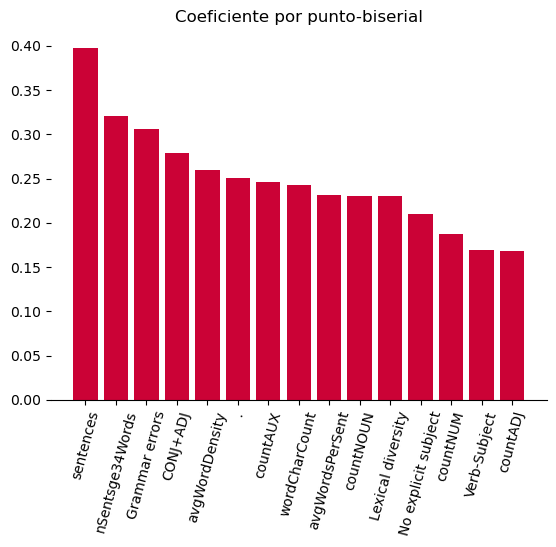

,point biserial correlation,p-value,mutual info
sentences,0.397552,6.035535e-126,0.156893
nSentsge34Words,-0.320522,4.448932e-80,0.101136
Grammar errors,-0.305898,9.465737e-73,0.180324
CONJ+ADJ,0.278303,5.005216e-60,0.131585
avgWordDensity,-0.259975,2.405780e-52,0.203518
...,...,...,...
\,-0.006661,7.014232e-01,0.001649
caps,-0.005406,7.557093e-01,0.004076
-,-0.004074,8.146297e-01,0.028970
nSentsle11Words,0.002986,8.635522e-01,0.105301


In [ ]:
correlations = correlations.sort_values(by="point biserial correlation" ,key=lambda v: abs(v), ascending=False)
n = 15
pb15 = correlations.index[:n]
fig, ax = plt.subplots()
ax.bar(correlations.index[:n], height=abs(correlations["point biserial correlation"]).to_list()[:n], color = '#CB0236')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.set_title('Coeficiente por punto-biserial')
plt.xticks(correlations.index[:n], rotation=75)
plt.show()
correlations

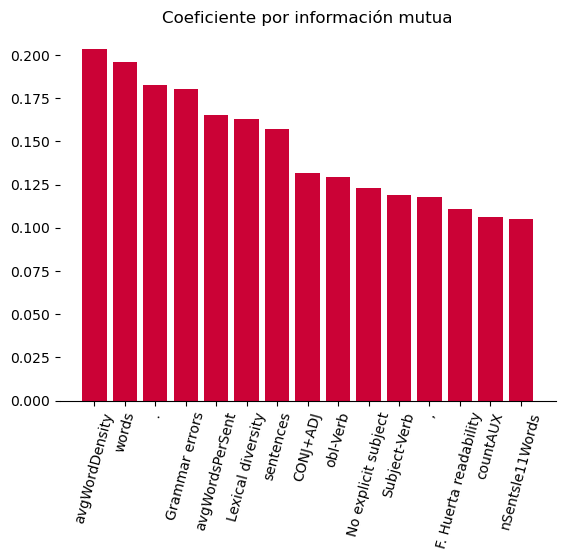

,point biserial correlation,p-value,mutual info
avgWordDensity,-0.259975,2.405780e-52,0.203518
words,0.152083,1.317041e-18,0.195793
.,0.251083,7.831792e-49,0.182661
Grammar errors,-0.305898,9.465737e-73,0.180324
avgWordsPerSent,-0.231778,1.122148e-41,0.165154
...,...,...,...
?,-0.023078,1.840402e-01,0.000000
*,-0.015010,3.876290e-01,0.000000
#,-0.015273,3.793478e-01,0.000000
¡,0.008703,6.164336e-01,0.000000


In [30]:
correlations = correlations.sort_values(by="mutual info" ,key=lambda v: abs(v), ascending=False)
mi15 = correlations.index[:n]
fig, ax = plt.subplots()
ax.bar(correlations.index[:n], height=abs(correlations["mutual info"]).to_list()[:n], color = '#CB0236')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.set_title('Coeficiente por información mutua')
plt.xticks(correlations.index[:n], rotation=75)
plt.show()
correlations

In [32]:
set(mi15).intersection(pb15), len(set(pb15).intersection(mi15))

({'.',
  'CONJ+ADJ',
  'Grammar errors',
  'Lexical diversity',
  'No explicit subject',
  'avgWordDensity',
  'avgWordsPerSent',
  'countAUX',
  'sentences'},
 9)